In [105]:
import requests
import pandas as pd
import csv
import numpy as np 
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sqlalchemy import Column, Integer, String, Boolean, Date, CHAR, DateTime
from sqlalchemy.orm import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker, declarative_base
import logging

In [118]:
url = "https://jobicy.p.rapidapi.com/api/v2/remote-jobs"

# Request headers
headers = {
    "X-RapidAPI-Key": "d193e29157msh16cba69f1b99500p1aa91cjsn89fb8a04c8a6",
    "X-RapidAPI-Host": "jobicy.p.rapidapi.com"
}

# Make the API request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Convert the JSON response to a pandas DataFrame
    data = response.json()['jobs']
    df = pd.DataFrame(data)
    
    # Save the DataFrame to a CSV file
    df.to_csv('jobs1.csv', index=False)
    
    print("Data has been successfully saved to 'jobs1.csv'")
else:
    print(f"Error in obtaining data: {response.status_code}")

Data has been successfully saved to 'jobs1.csv'


# EDA (Exploratory Data Analysis)

We start by reading our csv:

In [3]:
jobs1 = pd.read_csv('../Data/jobs1.csv')
jobs1.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [4]:
jobs1.shape

(3755, 11)

In [5]:
jobs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In this analysis, we can see that we have no null values in our dataset, which is significant for our work.

In the following graph we can see what type of data we are working with:

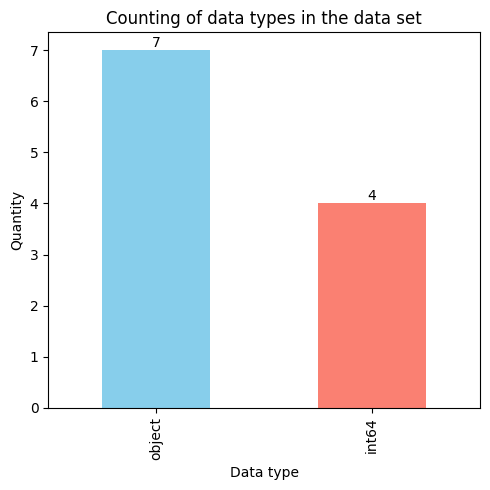

In [4]:
import matplotlib.pyplot as plt

data_types_counts = jobs1.dtypes.value_counts()


colors = ['skyblue', 'salmon', 'green']

plt.figure(figsize=(5, 5))
bar_plot = data_types_counts.plot(kind='bar', color=colors)

plt.xlabel('Data type')
plt.ylabel('Quantity')
plt.title('Counting of data types in the data set')


for i, value in enumerate(data_types_counts):
    plt.text(i, value + 0, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In this case, we are only working with two data types "object" with 7 columns, and "integer" with 4.

Now, let us review the unique values per columns:

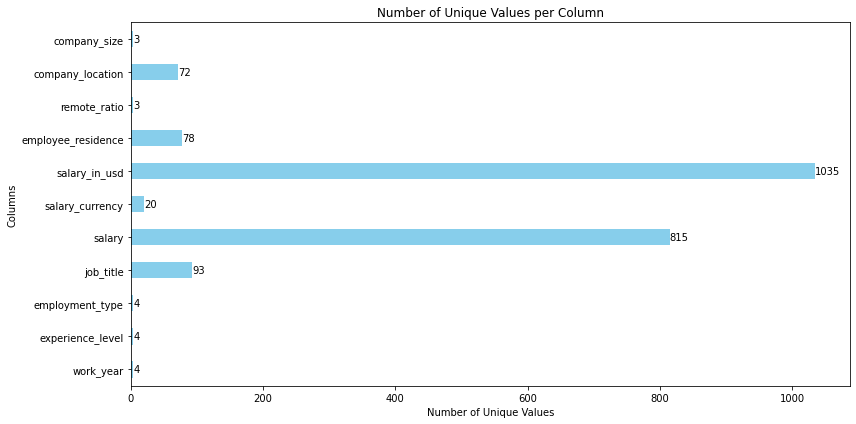

In [7]:
import matplotlib.pyplot as plt


unique_counts = jobs1.nunique()


colors = ['skyblue']

plt.figure(figsize=(12, 6)) 
bar_plot = unique_counts.plot(kind='barh', color=colors)

plt.ylabel('Columns')
plt.xlabel('Number of Unique Values')
plt.title('Number of Unique Values per Column')


for i, value in enumerate(unique_counts):
    plt.text(value, i, str(value), ha='left', va='center')


plt.tight_layout()
plt.show()

As we can see, taking into account the amount of data, it is visible that values are repeated.

We use this ".tail" method to see the last records of our dataset, and thus have a more visible comparison of the data we are working with.

In [6]:
jobs1.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


And here we realize something, and that is that we are not only working with a single year as we thought, but we also have 2020 and 2021 as we see there.

With that in mind, let's see what years we are working with:

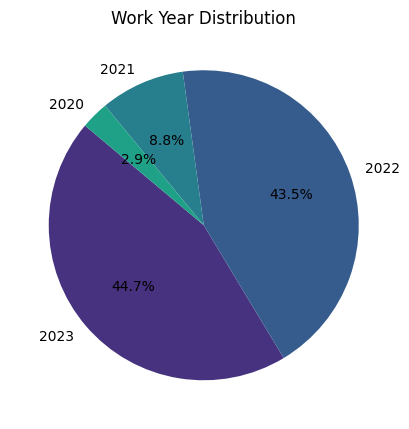

In [36]:
work_year_counts = jobs1['work_year'].value_counts()
plt.figure(figsize=(5, 8))
plt.pie(work_year_counts, labels=work_year_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Work Year Distribution')
plt.show()

Now, reviewing this "work year distribution", we can see that the years range from 2020 to 2023.

The distribution of working years shows a significant increase in observations from 2021 onwards, with particularly marked growth in 2022 and 2023. This suggests that the dataset has been collected or updated to a large extent in these recent years. The progressive increase in observations from 2022 to 2023 indicates a greater representation of more recent data in the total set, which may reflect an intensification of work activities or an increased focus on collecting updated information in these years. This increase in recent data may be related to a greater focus on current labor market trends and emerging labor dynamics during these years.

### Transformations:

Let's look at the duplicate values:

In [8]:
jobs1.duplicated().sum()

1171

1. Transformation #1: Drop duplicates

In [9]:
jobs1=jobs1.drop_duplicates()
jobs1.duplicated().sum()

0

- Data Types: The data types of our dataset are accurate and appropriate for our analysis, indicating that the data is well-structured.

- Missing Values: We found no missing values in our dataset. This suggests that our data is complete and ready for analysis without the need for imputation.

- Duplicate Entries: Initially, there were 1351 duplicate entries in the dataset. However, we have successfully removed these duplicate rows, ensuring data integrity for our analysis.

These observations assure us that our dataset is in good shape and suitable for further analysis and insights.

In [10]:
unique_experience_levels = jobs1['experience_level'].unique()
unique_employment_types = jobs1['employment_type'].unique()
unique_company_sizes = jobs1['company_size'].unique()

print("Unique Experience Levels:", unique_experience_levels)
print("Unique Employment Types:", unique_employment_types)
print("Unique Company Sizes:", unique_company_sizes)

Unique Experience Levels: ['SE' 'MI' 'EN' 'EX']
Unique Employment Types: ['FT' 'CT' 'FL' 'PT']
Unique Company Sizes: ['L' 'S' 'M']


2. Transformation #2: Replace values

In [11]:
# Replace specific values in the 'experience_level' column
jobs1.loc[:, 'experience_level'] = jobs1['experience_level'].replace({
    'EN': 'Entry Level',
    'EX': 'Experienced',
    'MI': 'Mid-Level',
    'SE': 'Senior'  # Corregido el typo de 'Seniour' a 'Senior'
})

# Replace specific values in the 'employment_type' column
jobs1.loc[:, 'employment_type'] = jobs1['employment_type'].replace({
    'FT': 'Full time',
    'PT': 'Part time',
    'CT': 'Contractor',
    'FL': 'Freelancer'
})

# Replace specific values in the 'company_size' column
jobs1.loc[:, 'company_size'] = jobs1['company_size'].replace({
    'L': 'Large',
    'M': 'Medium',
    'S': 'Small'  # Corregido el typo de 'small' a 'Small'
})


Next, we can already see that the changes have been made perfectly.

In [34]:
jobs1.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large
1,2023,Mid-Level,Contractor,ML Engineer,30000,USD,30000,US,100,US,Small


3. But, we also noticed a small problem, and that is that in company_location and employee_residence, we have the abbreviations of the locations. To solve that, we will take out the unique values of both columns, investigating what those values are.

In [35]:
unique_locations = jobs1['company_location'].unique()
print(unique_locations)

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL'
 'MD' 'MT']


In [39]:
mapping = {'ES': 'Spain', 'US': 'United States', 'CA': 'Canada', 'DE': 'Germany', 'GB': 'United Kingdom', 'NG': 'Nigeria', 'IN': 'India', 'HK': 'Hong Kong', 'NL': 'Netherlands', 'CH': 'Switzerland', 'CF': 'Central African Republic', 'FR': 'France', 'FI': 'Finland', 'UA': 'Ukraine', 'IE': 'Ireland', 'IL': 'Israel', 'GH': 'Ghana', 'CO': 'Colombia', 'SG': 'Singapore', 'AU': 'Australia', 'SE': 'Sweden', 'SI': 'Slovenia', 'MX': 'Mexico', 'BR': 'Brazil', 'PT': 'Portugal', 'RU': 'Russia', 'TH': 'Thailand', 'HR': 'Croatia', 'VN': 'Vietnam', 'EE': 'Estonia', 'AM': 'Armenia', 'BA': 'Bosnia and Herzegovina', 'KE': 'Kenya', 'GR': 'Greece', 'MK': 'North Macedonia', 'LV': 'Latvia', 'RO': 'Romania', 'PK': 'Pakistan', 'IT': 'Italy', 'MA': 'Morocco', 'PL': 'Poland', 'AL': 'Albania', 'AR': 'Argentina', 'LT': 'Lithuania', 'AS': 'American Samoa', 'CR': 'Costa Rica', 'IR': 'Iran', 'BS': 'Bahamas', 'HU': 'Hungary', 'AT': 'Austria', 'SK': 'Slovakia', 'CZ': 'Czech Republic', 'TR': 'Turkey', 'PR': 'Puerto Rico', 'DK': 'Denmark', 'BO': 'Bolivia', 'PH': 'Philippines', 'BE': 'Belgium', 'ID': 'Indonesia', 'EG': 'Egypt', 'AE': 'United Arab Emirates', 'LU': 'Luxembourg', 'MY': 'Malaysia', 'HN': 'Honduras', 'JP': 'Japan', 'DZ': 'Algeria', 'IQ': 'Iraq', 'CN': 'China', 'NZ': 'New Zealand', 'CL': 'Chile', 'MD': 'Moldova', 'MT': 'Malta'}

jobs1['company_location'] = jobs1['company_location'].map(mapping)

In [38]:
unique_locations = jobs1['employee_residence'].unique()
print(unique_locations)

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL' 'CH' 'CF' 'FR' 'AU'
 'FI' 'UA' 'IE' 'IL' 'GH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'BR' 'TH'
 'HR' 'PL' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK'
 'IT' 'MA' 'LT' 'BE' 'AS' 'IR' 'HU' 'SK' 'CN' 'CZ' 'CR' 'TR' 'CL' 'PR'
 'DK' 'BO' 'PH' 'DO' 'EG' 'ID' 'AE' 'MY' 'JP' 'EE' 'HN' 'TN' 'RU' 'DZ'
 'IQ' 'BG' 'JE' 'RS' 'NZ' 'MD' 'LU' 'MT']


In [40]:
jobs1['employee_residence'] = jobs1['employee_residence'].map({'ES': 'Spain', 'US': 'United States', 'CA': 'Canada', 'DE': 'Germany', 'GB': 'United Kingdom', 'NG': 'Nigeria', 'IN': 'India', 'HK': 'Hong Kong', 'PT': 'Portugal', 'NL': 'Netherlands', 'CH': 'Switzerland', 'CF': 'Central African Republic', 'FR': 'France', 'AU': 'Australia', 'FI': 'Finland', 'UA': 'Ukraine', 'IE': 'Ireland', 'IL': 'Israel', 'GH': 'Ghana', 'AT': 'Austria', 'CO': 'Colombia', 'SG': 'Singapore', 'SE': 'Sweden', 'SI': 'Slovenia', 'MX': 'Mexico', 'UZ': 'Uzbekistan', 'BR': 'Brazil', 'TH': 'Thailand', 'HR': 'Croatia', 'PL': 'Poland', 'KW': 'Kuwait', 'VN': 'Vietnam', 'CY': 'Cyprus', 'AR': 'Argentina', 'AM': 'Armenia', 'BA': 'Bosnia and Herzegovina', 'KE': 'Kenya', 'GR': 'Greece', 'MK': 'North Macedonia', 'LV': 'Latvia', 'RO': 'Romania', 'PK': 'Pakistan', 'IT': 'Italy', 'MA': 'Morocco', 'LT': 'Lithuania', 'BE': 'Belgium', 'AS': 'American Samoa', 'IR': 'Iran', 'HU': 'Hungary', 'SK': 'Slovakia', 'CN': 'China', 'CZ': 'Czech Republic', 'CR': 'Costa Rica', 'TR': 'Turkey', 'CL': 'Chile', 'PR': 'Puerto Rico', 'DK': 'Denmark', 'BO': 'Bolivia', 'PH': 'Philippines', 'DO': 'Dominican Republic', 'EG': 'Egypt', 'ID': 'Indonesia', 'AE': 'United Arab Emirates', 'MY': 'Malaysia', 'JP': 'Japan', 'EE': 'Estonia', 'HN': 'Honduras', 'TN': 'Tunisia', 'RU': 'Russia', 'DZ': 'Algeria', 'IQ': 'Iraq', 'BG': 'Bulgaria', 'JE': 'Jersey', 'RS': 'Serbia', 'NZ': 'New Zealand', 'MD': 'Moldova', 'LU': 'Luxembourg', 'MT': 'Malta'})

In [47]:
jobs1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full time,Principal Data Scientist,80000,EUR,85847,Spain,100,Spain,Large
1,2023,Mid-Level,Contractor,ML Engineer,30000,USD,30000,United States,100,United States,Small
2,2023,Mid-Level,Contractor,ML Engineer,25500,USD,25500,United States,100,United States,Small
3,2023,Senior,Full time,Data Scientist,175000,USD,175000,Canada,100,Canada,Medium
4,2023,Senior,Full time,Data Scientist,120000,USD,120000,Canada,100,Canada,Medium


Now we can see our transformations done as we wanted, although there are some jobs that have the same attributes, but the only thing that changes is the salary, where we concluded that it is different company names that have them. Unfortunately this dataset does not contain the company name to broaden the focus of our analysis a bit more, but that's ok.

We can also see that in the table, we have two columns with salaries, "salary" and "salary_in_usd", and this changes as not all jobs share the same currency, because of the countries.

As one of our focus is to look at U.S. wages, let's look at a boxplot to see if we have outliers.

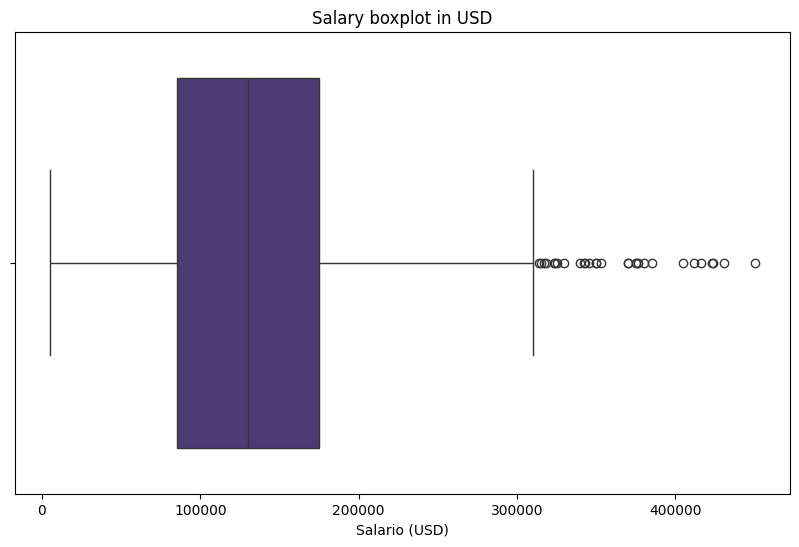

In [63]:
# Crear boxplot con outliers usando seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x=jobs1['salary_in_usd'])

# Título y etiquetas
plt.title('Salary boxplot in USD')
plt.xlabel('Salario (USD)')
plt.show()

As we can see, we do have outliers in our column, to solve this, we will use the interquantile rank (IQR)

In [89]:
Q1 = jobs1['salary_in_usd'].quantile(0.25)
Q3 = jobs1['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

jobs1['salary_in_usd'] = jobs1['salary_in_usd'].apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else IQR)

Using IQR for data transformation is an effective practice that allows handling outliers that may distort the analysis or results. This technique helps to obtain a more accurate and robust representation of the data, which facilitates a more reliable and meaningful analysis.

We verify:

In [99]:
Q1 = jobs1['salary_in_usd'].quantile(0.25)
Q3 = jobs1['salary_in_usd'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = jobs1[(jobs1['salary_in_usd'] < lower_bound) | (jobs1['salary_in_usd'] > upper_bound)]

num_outliers = outliers.shape[0]

print(f"Number of outliers: {num_outliers}")

Number of outliers: 0


## Some Graphs of Analysis
Now, we will examine the unique values in certain columns, such as:

- Experience Level
- Employment Type
- Company Size
The purpose of this step is to identify values that may need to be replaced with more appropriate and standardized terms.
- Salary_usd

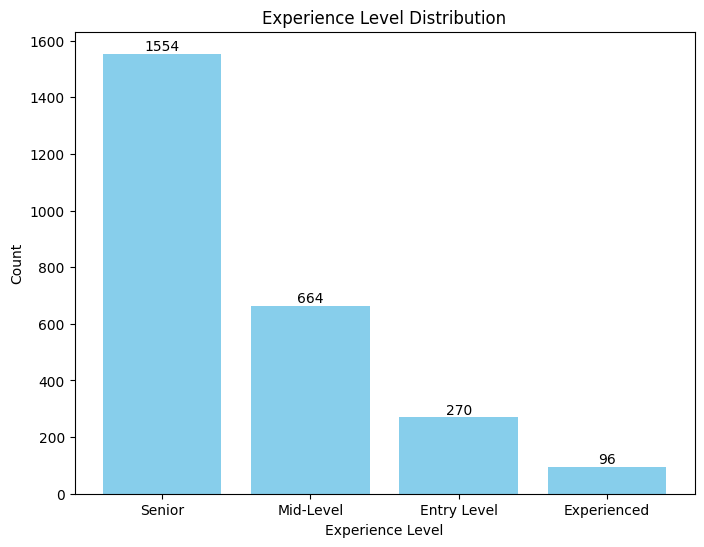

In [48]:
# Calcular el recuento de valores en la columna 'experience_level'
experience_level_counts = jobs1["experience_level"].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(experience_level_counts.index, experience_level_counts.values, color='skyblue')

# Añadir etiquetas de texto sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Experience Level Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

Based on the data provided, it can be concluded that the "Senior" category is the most predominant with a total of 1554 values. This information suggests that the "Senior" position is possibly the most common or in demand within the data set analyzed. This trend could indicate a significant preference or need to hire professionals with experience or advanced skills in the specific areas related to these positions. This observation could be useful for companies and recruiters in identifying labor market demands and adjusting their hiring strategies accordingly.

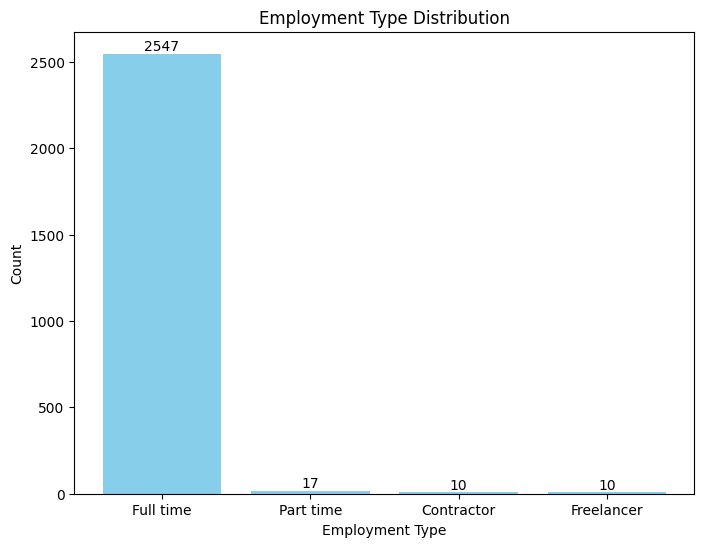

In [100]:
experience_level_counts = jobs1["employment_type"].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(experience_level_counts.index, experience_level_counts.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Count')

plt.show()

Based on the data provided, it can be concluded that the "Full time" employment type is the most predominant with a total of 2547 values. This information indicates that the majority of job opportunities within the dataset are for full-time positions. This trend may reflect a strong demand in the labor market for roles that require a full-time commitment, which may be indicative of an active economy and growing companies seeking full-time employees to meet their operational and strategic needs. This observation could be useful for candidates seeking employment, as they could focus their search efforts on full-time roles, which appear to be the most abundant in the current market.

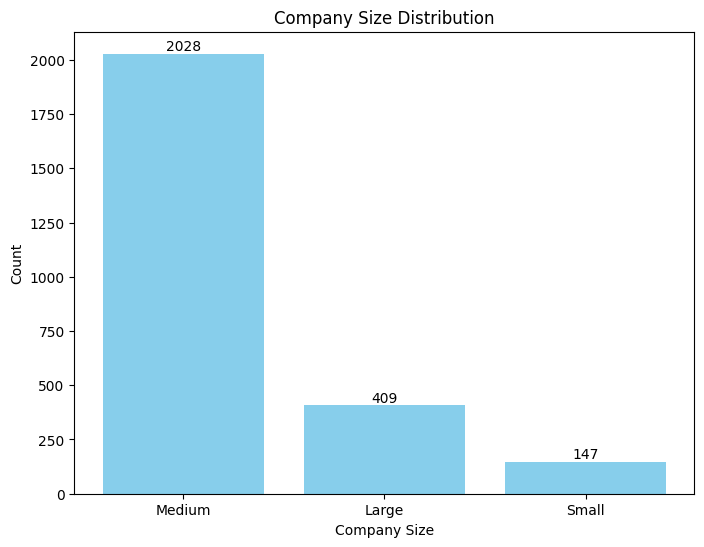

In [50]:
# Calcular el recuento de valores en la columna 'experience_level'
company_size_counts = jobs1["company_size"].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(company_size_counts.index, company_size_counts.values, color='skyblue')

# Añadir etiquetas de texto sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

Based on the data provided, it can be concluded that "Medium" sized companies are the most represented in the data set, with a total of 2028 records. This information suggests that medium-sized companies may have a significant presence in the analyzed labor market. It is possible that these companies represent an attractive mix for employees, offering a balance of stability and growth opportunities, as well as a more dynamic and agile work environment compared to large corporations. For professionals seeking employment, this observation may be relevant, as they may consider focusing their search efforts on mid-sized companies that appear to offer a considerable amount of opportunities within the current labor market.

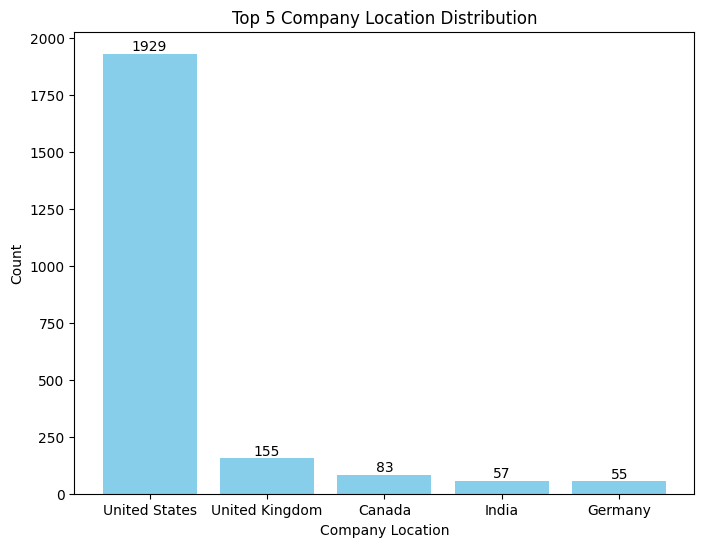

In [53]:
# Calcular el recuento de valores en la columna 'experience_level'
company_location_counts = jobs1["company_location"].value_counts().head()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(company_location_counts.index, company_location_counts.values, color='skyblue')

# Añadir etiquetas de texto sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

# Añadir título y etiquetas
plt.title('Top 5 Company Location Distribution')
plt.xlabel('Company Location')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

It can be concluded that "United States" leads the list with the highest number of companies compared to other countries in the dataset. This observation indicates a strong business presence and activity in the United States, which may reflect its robust economy and dominant role in the global business arena. This concentration of companies in the United States may offer a wide range of job and investment opportunities, making it a key market for professionals and companies. This trend can influence strategic decision making related to business expansion, investment in talent and exploration of market opportunities in the specific sector being analyzed.

In the following graph we can see a top, to see which is the most repeated work.

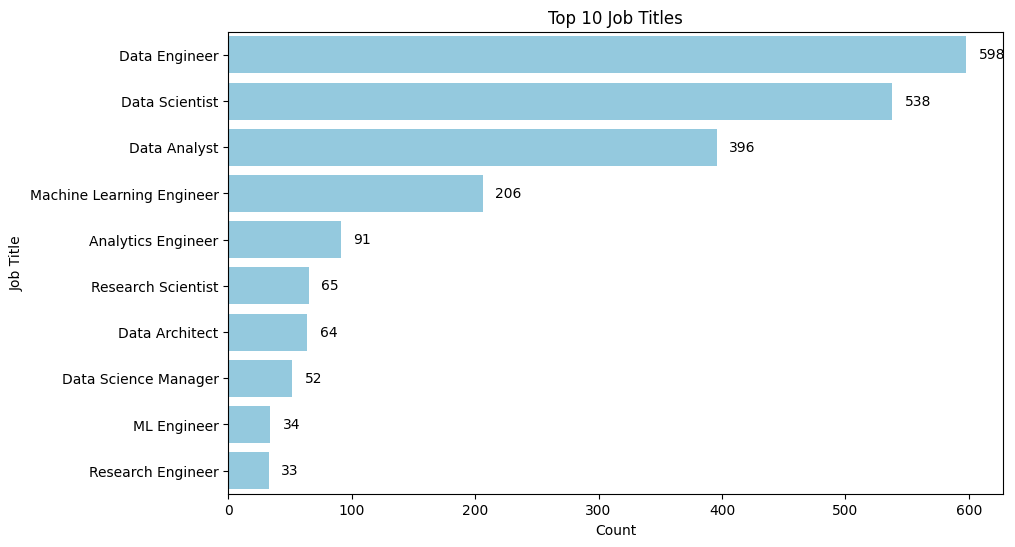

In [58]:
# Calculate the top 10 most common job titles
top_job_titles = jobs1['job_title'].value_counts().nlargest(10)

# Create a new figure for the plot
plt.figure(figsize=(10, 6))

# Generate a bar plot using seaborn with skyblue color
barplot = sns.barplot(y=top_job_titles.index, x=top_job_titles.values, color='skyblue', order=top_job_titles.index)

# Add text annotations to the bar plot
for i in range(top_job_titles.shape[0]):
    barplot.text(top_job_titles.iloc[i] + 10, i, top_job_titles.iloc[i], va='center')

# Add title and labels to the plot
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')

# Display the plot
plt.show()


Looking at this result, it can be concluded that the position of "Data Engineer" is the most predominant with a total of 598 values in the analyzed dataset. This information suggests a significant demand in the labor market for professionals specialized in data engineering. The growing importance of data management and analytics in modern businesses could be driving this high demand for Data Engineer roles. For professionals seeking employment in this field, this observation indicates a strong presence of opportunities in data engineering roles, which could influence their career decisions and job search focus towards these in-demand positions.

Our final dataset would look like this with its respective transformations:

In [103]:
jobs1.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full time,Principal Data Scientist,80000,EUR,85847.0,Spain,100,Spain,Large
1,2023,Mid-Level,Contractor,ML Engineer,30000,USD,30000.0,United States,100,United States,Small
2,2023,Mid-Level,Contractor,ML Engineer,25500,USD,25500.0,United States,100,United States,Small
3,2023,Senior,Full time,Data Scientist,175000,USD,175000.0,Canada,100,Canada,Medium
4,2023,Senior,Full time,Data Scientist,120000,USD,120000.0,Canada,100,Canada,Medium
5,2023,Senior,Full time,Applied Scientist,222200,USD,222200.0,United States,0,United States,Large
6,2023,Senior,Full time,Applied Scientist,136000,USD,136000.0,United States,0,United States,Large
7,2023,Senior,Full time,Data Scientist,219000,USD,219000.0,Canada,0,Canada,Medium
8,2023,Senior,Full time,Data Scientist,141000,USD,141000.0,Canada,0,Canada,Medium
9,2023,Senior,Full time,Data Scientist,147100,USD,147100.0,United States,0,United States,Medium


Put the transformed table into the database:

In [107]:
file_path = '../Credentials/keys.json'
if os.path.exists(file_path):
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
        user = data["user"]
        password = data["password"]
        port = data["port"]
        server = data["server"]
        db = data["db"]
else:
    logging.info(f"File '{file_path}' not found.")
db_connection = f"postgresql://{user}:{password}@{server}:{port}/{db}"
engine = create_engine(db_connection)

In [109]:
Base = declarative_base()

class JobsNew(Base):
    __tablename__ = 'jobs_new'
    id = Column(Integer, primary_key=True, autoincrement=True)
    work_year = Column(Integer, nullable=False)
    experience_level = Column(String(100), nullable=False)
    employment_type = Column(String(100), nullable=False)
    job_title = Column(String(100), nullable=False)
    salary = Column(Integer, nullable=False)
    salary_currency = Column(String(100), nullable=False)
    salary_in_usd = Column(Integer, nullable=False)
    employee_residence = Column(String(100), nullable=False)
    remote_ratio = Column(Integer, nullable=False)
    company_location = Column(String(100), nullable=False)
    company_size = Column(String(100), nullable=False)

Base.metadata.create_all(engine)

In [110]:
jobs1.to_sql('jobs_new', engine, if_exists='replace', index=False)
logging.info("Data inserted")

In [111]:
connection = engine.connect() 
table_name = 'jobs_new'  
df = pd.read_sql_table(table_name, connection) 
jobs_new=df

In [112]:
jobs_new.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full time,Principal Data Scientist,80000,EUR,85847.0,Spain,100,Spain,Large
1,2023,Mid-Level,Contractor,ML Engineer,30000,USD,30000.0,United States,100,United States,Small
2,2023,Mid-Level,Contractor,ML Engineer,25500,USD,25500.0,United States,100,United States,Small
3,2023,Senior,Full time,Data Scientist,175000,USD,175000.0,Canada,100,Canada,Medium
4,2023,Senior,Full time,Data Scientist,120000,USD,120000.0,Canada,100,Canada,Medium


# AQUÍ HAY CAMBIO

In [91]:
# Define a dictionary for job roles and their corresponding salaries
job_roles = {
    'Data Engineer': 'Data Engineer',
    'Data Scientist': 'Data Scientist',
    'Data Analyst': 'Data Analyst',
    'Machine Learning Engineer': 'Machine Learning Engineer',
    'Analytics Engineer': 'Analytics Engineer'}

# Iterate over the job roles and calculate the highest, lowest, and average salaries
for role, title in job_roles.items():
    salaries = jobs1[jobs1['job_title'] == title]['salary_in_usd']
    max_salary = salaries.max()
    min_salary = salaries.min()
    avg_salary = int(salaries.mean())
    
    # Print the salary summary for each role
    print(role + ':')
    print('  - Highest Salary:', max_salary)
    print('  - Lowest Salary:', min_salary)
    print('  - Average Salary:', avg_salary)
    print()

Data Engineer:
  - Highest Salary: 300000.0
  - Lowest Salary: 12000.0
  - Average Salary: 137979

Data Scientist:
  - Highest Salary: 300240.0
  - Lowest Salary: 5679.0
  - Average Salary: 130950

Data Analyst:
  - Highest Salary: 250000.0
  - Lowest Salary: 5723.0
  - Average Salary: 103718

Machine Learning Engineer:
  - Highest Salary: 300000.0
  - Lowest Salary: 12000.0
  - Average Salary: 142949

Analytics Engineer:
  - Highest Salary: 289800.0
  - Lowest Salary: 7500.0
  - Average Salary: 150151



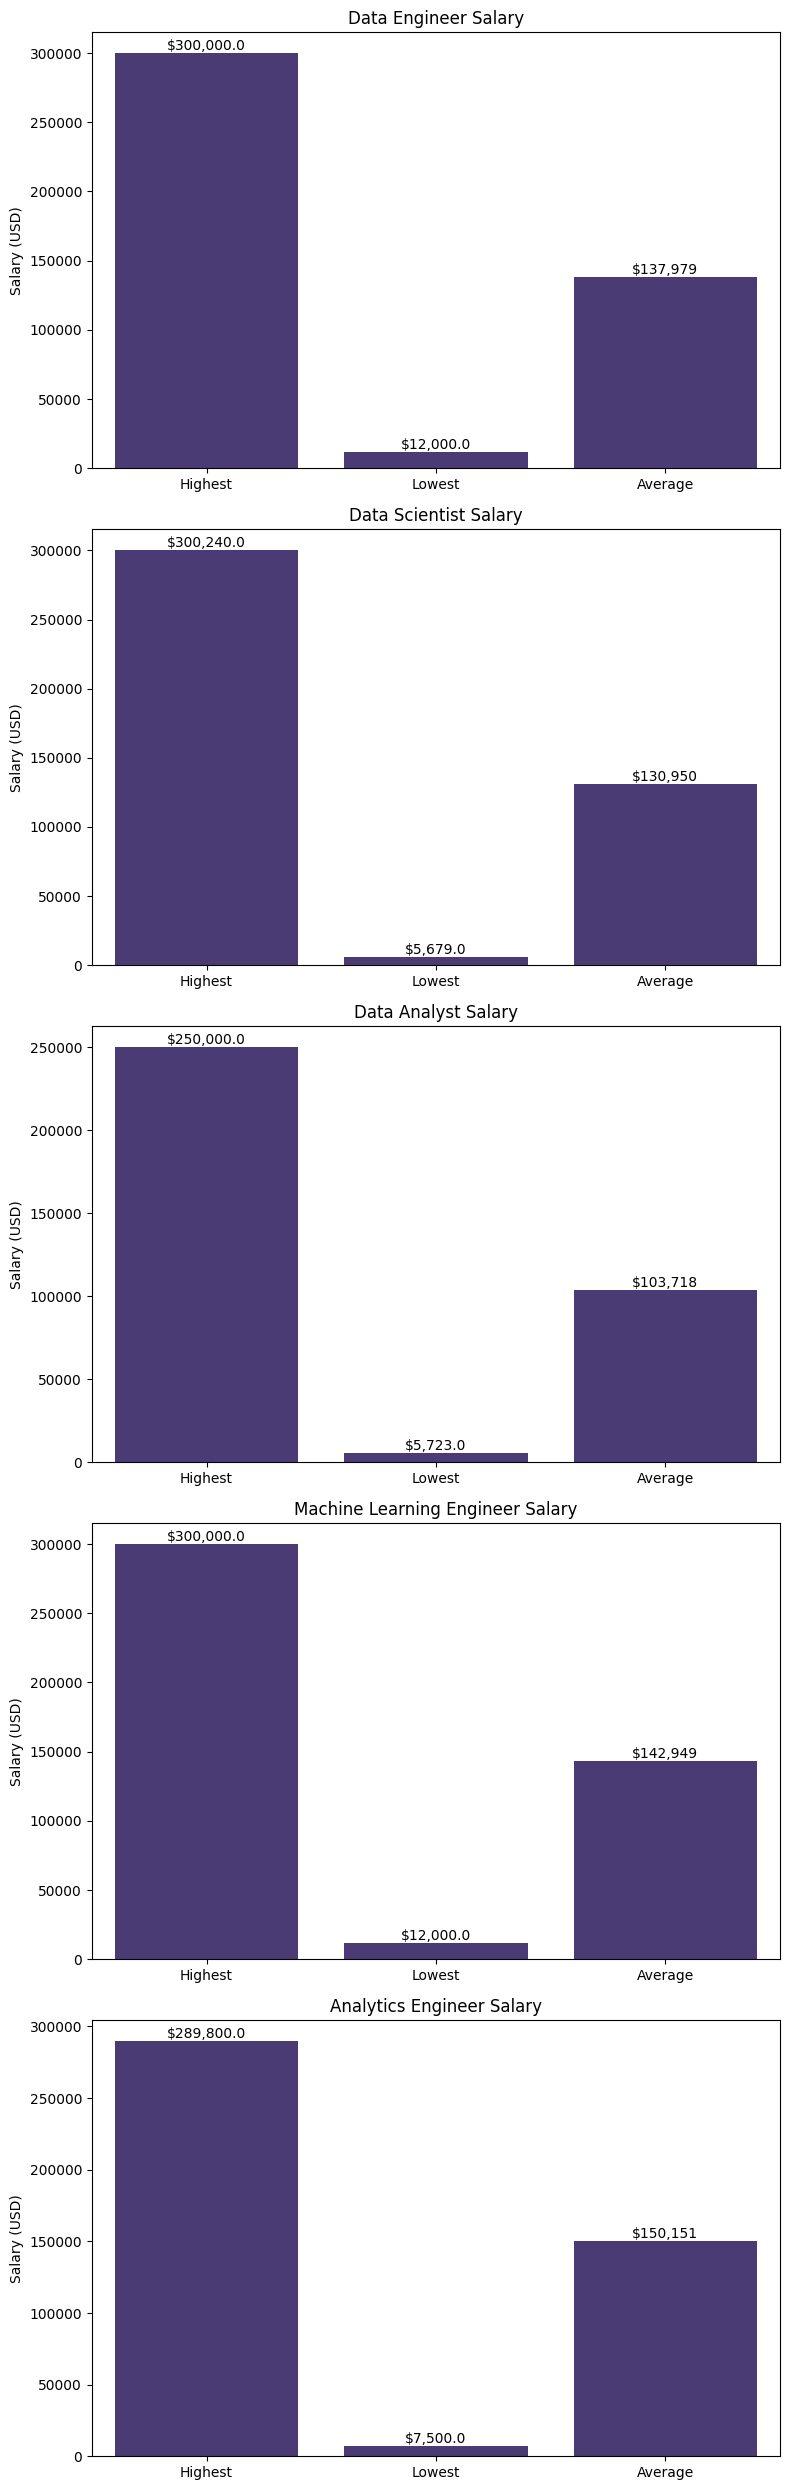

In [95]:
# Define the job roles
job_roles = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer']

# Set the seaborn palette
sns.set_palette("viridis")

# Create a grid of subplots for job roles' salary summary
fig, axs = plt.subplots(len(job_roles), 1, figsize=(8, 5 * len(job_roles)))

# Iterate over job roles
for i, role in enumerate(job_roles):
    # Filter the dataset for the specific job role
    salaries = jobs1[jobs1['job_title'] == role]['salary_in_usd']
    
    # Calculate the highest, lowest, and average salaries
    max_salary = salaries.max()
    min_salary = salaries.min()
    avg_salary = int(salaries.mean())
    
    # Plot the salary summary
    sns.barplot(x=['Highest', 'Lowest', 'Average'], y=[max_salary, min_salary, avg_salary], ax=axs[i])
    axs[i].set_title(f'{role} Salary')
    axs[i].set_ylabel('Salary (USD)')
    
    # Add value labels to the bars
    for j, value in enumerate([max_salary, min_salary, avg_salary]):
        axs[i].text(j, value, f'${value:,}', ha='center', va='bottom')

# Adjust spacing between subplots and remove any excess blank space
plt.tight_layout()

# Show the plot
plt.show()

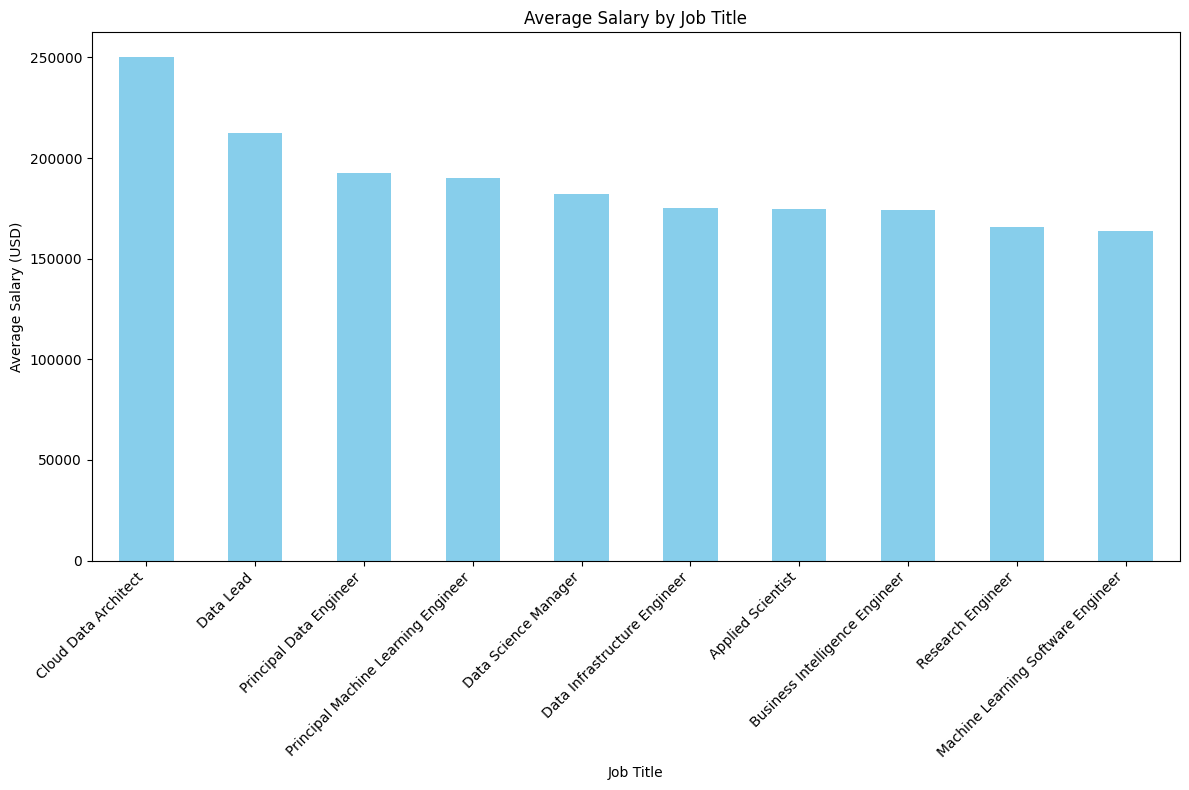

In [93]:
# Calcula el promedio de salario por título de trabajo y ordena los valores de forma descendente
average_salary_by_job_title = jobs1.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).astype(int).head(10)

# Crea el diagrama de barras
plt.figure(figsize=(12, 8))
average_salary_by_job_title.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Salary Analysis

In [20]:
average_salary = jobs1.groupby(["experience_level", "employment_type"])["salary_in_usd"].mean().reset_index().sort_values(by='salary_in_usd', ascending=False)
average_salary

,experience_level,employment_type,salary_in_usd
4,Experienced,Contractor,416000.000000
5,Experienced,Full time,188710.610526
12,Senior,Full time,154165.019367
8,Mid-Level,Full time,102742.781874
10,Senior,Contractor,97500.000000
6,Mid-Level,Contractor,78600.000000
1,Entry Level,Freelancer,75000.000000
2,Entry Level,Full time,74564.626984
0,Entry Level,Contractor,65234.500000
11,Senior,Freelancer,53333.333333


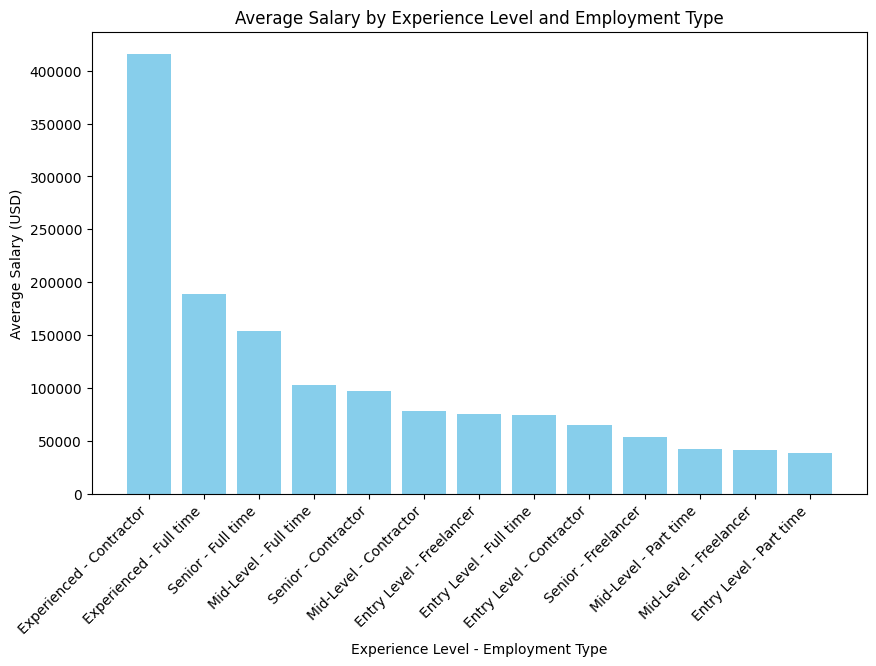

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_salary)), average_salary['salary_in_usd'], color='skyblue')
plt.xticks(range(len(average_salary)), average_salary['experience_level'] + " - " + average_salary['employment_type'], rotation=45, ha="right")
plt.title('Average Salary by Experience Level and Employment Type')
plt.xlabel('Experience Level - Employment Type')
plt.ylabel('Average Salary (USD)')
plt.show()

- Experienced - Contractor: Experienced contractors have the highest average salary shown on the graph.

- Senior - Full Time: Full-time senior employees have a high average salary.

- Mid-Level - Full Time: Full-time mid-level employees show a lower salary range than the previous ones.

- Entry Level - Part Time: Part-time entry-level employees have the lowest average salary shown on this graph.

The graph shows how the average salary varies not only with the level of experience but also with the type of employment, with experienced contractors having the highest income potential.

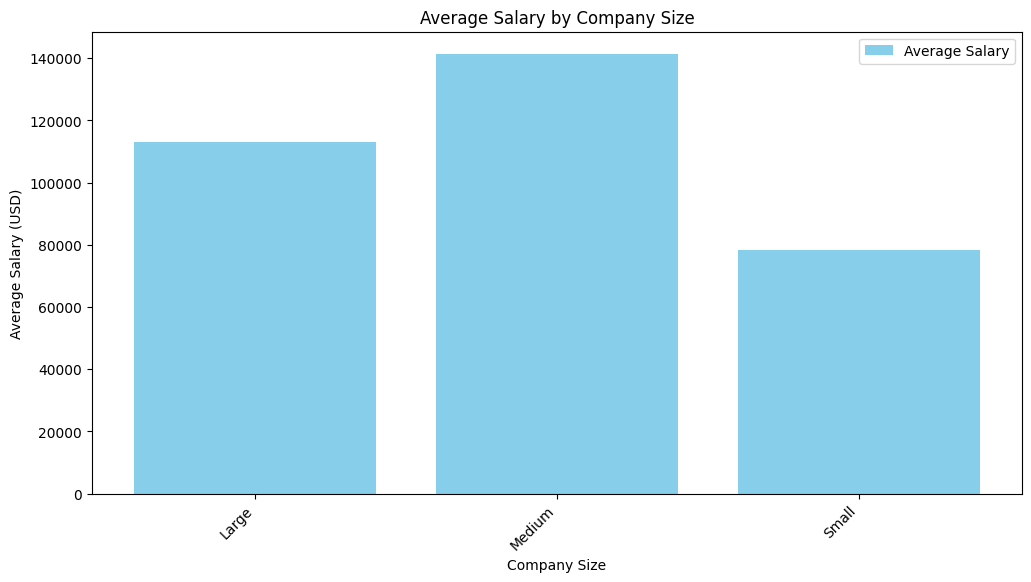

In [22]:
avg_salary_by_size = jobs1.groupby("company_size")["salary_in_usd"].mean().reset_index()

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
plt.bar(avg_salary_by_size.index, avg_salary_by_size['salary_in_usd'], color='skyblue', label='Average Salary')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Company Size')
plt.xticks(avg_salary_by_size.index, avg_salary_by_size['company_size'], rotation=45, ha="right")
plt.legend()
plt.show()

- Large Companies: The bar for large companies shows an average salary of just over 120,000 USD.

- Medium Companies: The bar for medium companies also shows an average salary of just over 120,000 USD, but slightly less than that of large companies.

- Small Companies: The bar for small companies shows a significantly lower average salary of around 60,000 USD.

The graph shows that large and medium companies offer similar average salaries, which are significantly higher compared to small companies.

### Average Salary and Experience Level relation

In [98]:
import pandas as pd

# Calcula el primer y tercer cuartil
Q1 = jobs1['salary_in_usd'].quantile(0.25)
Q3 = jobs1['salary_in_usd'].quantile(0.75)

# Calcula el rango intercuartil (IQR)
IQR = Q3 - Q1

# Define los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encuentra los outliers
outliers = jobs1[(jobs1['salary_in_usd'] < lower_bound) | (jobs1['salary_in_usd'] > upper_bound)]

# Cuenta el número de outliers
num_outliers = outliers.shape[0]

print(f"Number of outliers: {num_outliers}")

Number of outliers: 0


- Senior: Dark blue box with several outliers, indicating higher variability in salaries.

- Mid-Level: Light blue box with fewer outliers compared to Senior level.

- Entry Level: Light green box with minimal outliers, showing the least salary range.

- Experienced: Dark green box with one outlier, suggesting a high salary potential for experienced professionals.

The graph illustrates that as the experience level increases, so does the average salary, with experienced professionals earning the most. The presence of outliers, especially at the Senior and Experienced levels, suggests that there can be significant variations in salaries within those categories.

### Average Salary with Employment Type relation 


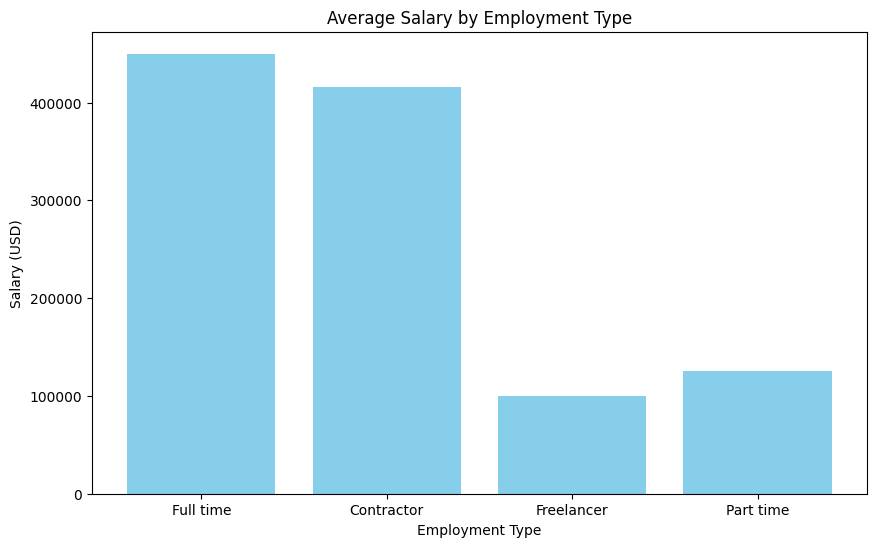

In [32]:
plt.figure(figsize=(10, 6))
barplot = plt.bar(jobs1['employment_type'], jobs1['salary_in_usd'], color='skyblue')
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary (USD)')


plt.show()

- Full Time: Full-time employees have one of the highest average salaries, with the bar reaching up to 400,000 USD.

- Contractor: Contractors also have high average salaries, comparable to full-time employees.

- Freelancer: Freelancers have a significantly lower average salary, as indicated by a shorter bar.

- Part Time: Part-time employees have the lowest average salary, with the shortest bar on the graph.

This graph illustrates the differences in average salaries based on the type of employment, with full-time and contract positions generally offering higher salaries compared to freelance and part-time work.